# Make a schematic plot of a cluster tree

In [1]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()

In [2]:
if not os.path.isfile('pdf_tree_data.npy'):
    np.random.seed(0)
    data = np.hstack(
       [np.random.normal(loc=-4.0, scale=1.0, size=90),
       np.random.normal(loc=-0.5, scale=0.15, size=100),
       np.random.normal(loc=3.5, scale=0.1, size=75)]
    )

    np.save('pdf_tree_data.npy', data)
else:
    data = np.load('pdf_tree_data.npy')

In [3]:
kde = statsmodels.nonparametric.kde.KDEUnivariate(data)
kde.fit()
pdf = kde.density
support = kde.support

/Users/leland/anaconda3/envs/hdbscan_dev/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [4]:
merge_levels = [0.041, 0.0765]
merge_xs = [-2.65, 1.5]
mode_levels = [0.091, 0.148, 0.107]
mode_xs = [-4.025, -0.57, 3.475]

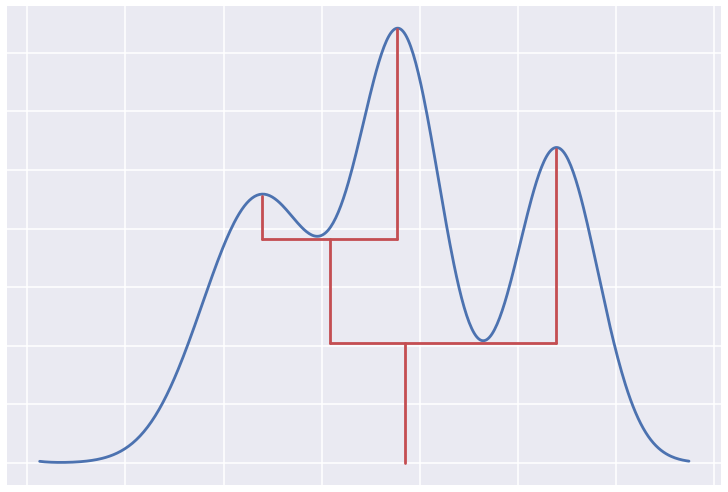

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(support, pdf)
# Vertical branches
ax.plot([mode_xs[0]] * 2, [merge_levels[1], mode_levels[0]], c='r')
ax.plot([mode_xs[1]] * 2, [merge_levels[1], mode_levels[1]], c='r')
ax.plot([mode_xs[2]] * 2, [merge_levels[0], mode_levels[2]], c='r')
ax.plot([np.mean(mode_xs[:2])] * 2, [merge_levels[0], merge_levels[1]], c='r')
ax.plot([np.mean(mode_xs)] * 2, [0.0, merge_levels[0]], c='r')
# Horizontal connectors
ax.plot([mode_xs[0], mode_xs[1]], [merge_levels[1]] * 2, c='r')
ax.plot([np.mean(mode_xs[:2]), mode_xs[2]], [merge_levels[0]] * 2, c='r')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.savefig('cluster_tree.png')

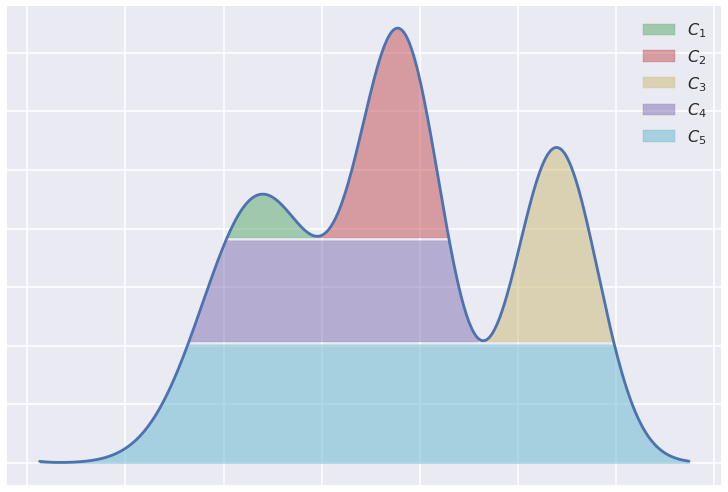

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(support, pdf)

# First mode
mode_selection = (pdf > merge_levels[1]) & (support < merge_xs[0])
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = (merge_levels[1] + 0.0005) * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='g', label="$C_1$")

# Second mode
mode_selection = (pdf > merge_levels[1]) & (support > merge_xs[0]) & (support < merge_xs[1])
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = (merge_levels[1] + 0.0005) * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='r', label="$C_2$")

# Third mode
mode_selection = (pdf > merge_levels[0]) & (support > merge_xs[1])
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = (merge_levels[0] + 0.0005) * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='y', label="$C_3$")

# Merged mode
mode_selection = (pdf > merge_levels[0]) & (support < merge_xs[1])
xs = support[mode_selection]
ys1 = np.min(np.vstack([pdf[mode_selection], 
                        (merge_levels[1] - 0.0005) * np.ones(xs.shape[0])]), axis=0)
ys2 = (merge_levels[0] + 0.0005) * np.ones(xs.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color=sns.color_palette('deep')[3], label="$C_4$")

# Final mode
xs = support
ys1 = np.min(np.vstack([pdf, 
                        (merge_levels[0] - 0.0005) * np.ones(xs.shape[0])]), axis=0)

ax.fill_between(xs, ys1, 0, alpha=0.5, color=sns.color_palette('deep')[5], label="$C_5$")
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False);
plt.legend(loc='best')
plt.savefig('excess_of_mass.png')

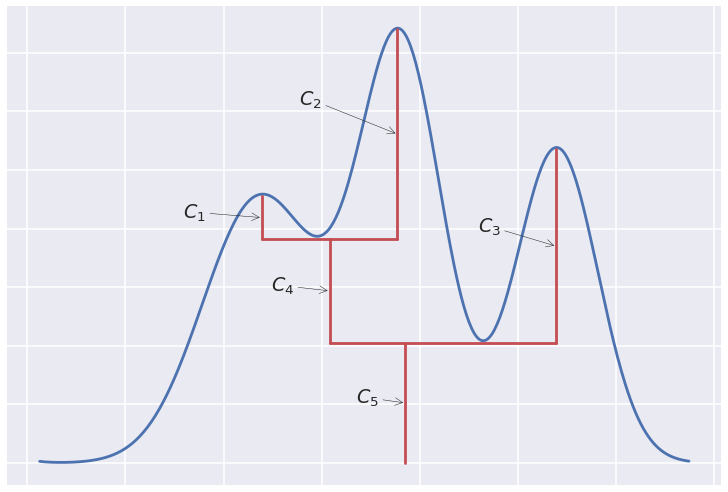

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(support, pdf)
# Vertical branches
ax.plot([mode_xs[0]] * 2, [merge_levels[1], mode_levels[0]], c='r')
ax.plot([mode_xs[1]] * 2, [merge_levels[1], mode_levels[1]], c='r')
ax.plot([mode_xs[2]] * 2, [merge_levels[0], mode_levels[2]], c='r')
ax.plot([np.mean(mode_xs[:2])] * 2, [merge_levels[0], merge_levels[1]], c='r')
ax.plot([np.mean(mode_xs)] * 2, [0.0, merge_levels[0]], c='r')
# Horizontal connectors
ax.plot([mode_xs[0], mode_xs[1]], [merge_levels[1]] * 2, c='r')
ax.plot([np.mean(mode_xs[:2]), mode_xs[2]], [merge_levels[0]] * 2, c='r')
ax.annotate('$C_1$', 
            [mode_xs[0], np.mean([merge_levels[1], mode_levels[0]])],
            [mode_xs[0] - 2.0, np.mean([merge_levels[1], mode_levels[0]])],
            arrowprops={'arrowstyle':'->'})
ax.annotate('$C_2$', 
            [mode_xs[1], np.mean([merge_levels[1], mode_levels[1]])],
            [mode_xs[1] - 2.5, np.mean([merge_levels[1], mode_levels[1]]) + 0.01],
            arrowprops={'arrowstyle':'->'})
ax.annotate('$C_3$', 
            [mode_xs[2], np.mean([merge_levels[0], mode_levels[2]])],
            [mode_xs[2] - 2.0, np.mean([merge_levels[0], mode_levels[2]]) + 0.005],
            arrowprops={'arrowstyle':'->'})
c4_x = np.mean(mode_xs[:2])
ax.annotate('$C_4$', 
            [c4_x, np.mean([merge_levels[0], merge_levels[1]])],
            [c4_x - 1.5, np.mean([merge_levels[0], merge_levels[1]])],
            arrowprops={'arrowstyle':'->'})
c5_x = np.mean(mode_xs)
ax.annotate('$C_5$', 
            [c5_x, merge_levels[0] / 2.0],
            [c5_x - 1.25, merge_levels[0] / 2.0],
            arrowprops={'arrowstyle':'->'})
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False);
plt.savefig('labelled_cluster_tree.png')